In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('/content/portugal-housing-sample.csv')
data.head()

,Price,District,City,Town,Type,EnergyCertificate,Floor,Lift,Parking,HasParking,...,Elevator,ElectricCarsCharging,TotalRooms,NumberOfBedrooms,NumberOfWC,ConservationStatus,LivingArea,LotSize,BuiltArea,NumberOfBathrooms
0,55000.0,Coimbra,Figueira da Foz,Alqueidão,Land,NC,NaN,False,0.0,False,...,NaN,NaN,NaN,NaN,NaN,NaN,1287.0,NaN,NaN,0.0
1,289000.0,Setúbal,Montijo,Canha,House,D,NaN,False,2.0,True,...,NaN,NaN,4.0,NaN,NaN,NaN,156.0,NaN,NaN,4.0
2,46500.0,Lisboa,Lourinhã,Lourinhã e Atalaia,Land,NC,NaN,NaN,0.0,NaN,...,False,False,NaN,NaN,0.0,NaN,NaN,2880.0,NaN,0.0
3,203000.0,Porto,Vila Nova de Gaia,Vilar de Andorinho,Apartment,E,3rd Floor,True,1.0,True,...,NaN,NaN,2.0,NaN,NaN,NaN,92.0,NaN,NaN,2.0
4,72500.0,Braga,Cabeceiras de Basto,"Refojos de Basto, Outeiro e Painzela",Land,NC,NaN,NaN,0.0,NaN,...,False,False,NaN,NaN,0.0,NaN,NaN,1954.0,NaN,0.0


In [3]:
# cek dimensi dataset
data.shape

(20000, 25)

In [4]:
# cek nama kolom dalam dataset
data.columns

Index(['Price', 'District', 'City', 'Town', 'Type', 'EnergyCertificate',
       'Floor', 'Lift', 'Parking', 'HasParking', 'ConstructionYear',
       'TotalArea', 'GrossArea', 'PublishDate', 'Garage', 'Elevator',
       'ElectricCarsCharging', 'TotalRooms', 'NumberOfBedrooms', 'NumberOfWC',
       'ConservationStatus', 'LivingArea', 'LotSize', 'BuiltArea',
       'NumberOfBathrooms'],
      dtype='object')

In [5]:
# menampilkan informasi dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Price                 20000 non-null  float64
 1   District              20000 non-null  object 
 2   City                  20000 non-null  object 
 3   Town                  19999 non-null  object 
 4   Type                  20000 non-null  object 
 5   EnergyCertificate     20000 non-null  object 
 6   Floor                 4925 non-null   object 
 7   Lift                  11874 non-null  object 
 8   Parking               19967 non-null  float64
 9   HasParking            11874 non-null  object 
 10  ConstructionYear      12965 non-null  float64
 11  TotalArea             18941 non-null  float64
 12  GrossArea             4790 non-null   float64
 13  PublishDate           2668 non-null   object 
 14  Garage                8123 non-null   object 
 15  Elevator           

In [6]:
# menampilkan jumlah nilai unik pada setiap kolom
data.nunique()

,0
Price,2130
District,24
City,264
Town,1869
Type,21
EnergyCertificate,11
Floor,18
Lift,2
Parking,4
HasParking,2


Missing value

Mengecek data kosong(null value) untuk ditangani lebih lanjut

In [7]:
# cek data kosong
data.isna().sum()

,0
Price,0
District,0
City,0
Town,1
Type,0
EnergyCertificate,0
Floor,15075
Lift,8126
Parking,33
HasParking,8126


In [8]:
columns_to_drop = ['PublishDate', 'ConservationStatus', 'NumberOfBedrooms', 'LotSize', 'BuiltArea', 'Floor', 'GrossArea']
data = data.drop(columns_to_drop, axis=1)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Price                 20000 non-null  float64
 1   District              20000 non-null  object 
 2   City                  20000 non-null  object 
 3   Town                  19999 non-null  object 
 4   Type                  20000 non-null  object 
 5   EnergyCertificate     20000 non-null  object 
 6   Lift                  11874 non-null  object 
 7   Parking               19967 non-null  float64
 8   HasParking            11874 non-null  object 
 9   ConstructionYear      12965 non-null  float64
 10  TotalArea             18941 non-null  float64
 11  Garage                8123 non-null   object 
 12  Elevator              8123 non-null   object 
 13  ElectricCarsCharging  8123 non-null   object 
 14  TotalRooms            11436 non-null  float64
 15  NumberOfWC         

In [10]:
def iqr_outliers(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    data[col] = data[col].mask(data[col] < lower_bound, Q1)
    data[col] = data[col].mask(data[col] > upper_bound, Q3)
    return data

# Pilih kolom numerik
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Terapkan fungsi iqr_outliers pada kolom numerik
for col in numeric_cols:
    data = iqr_outliers(data, col)

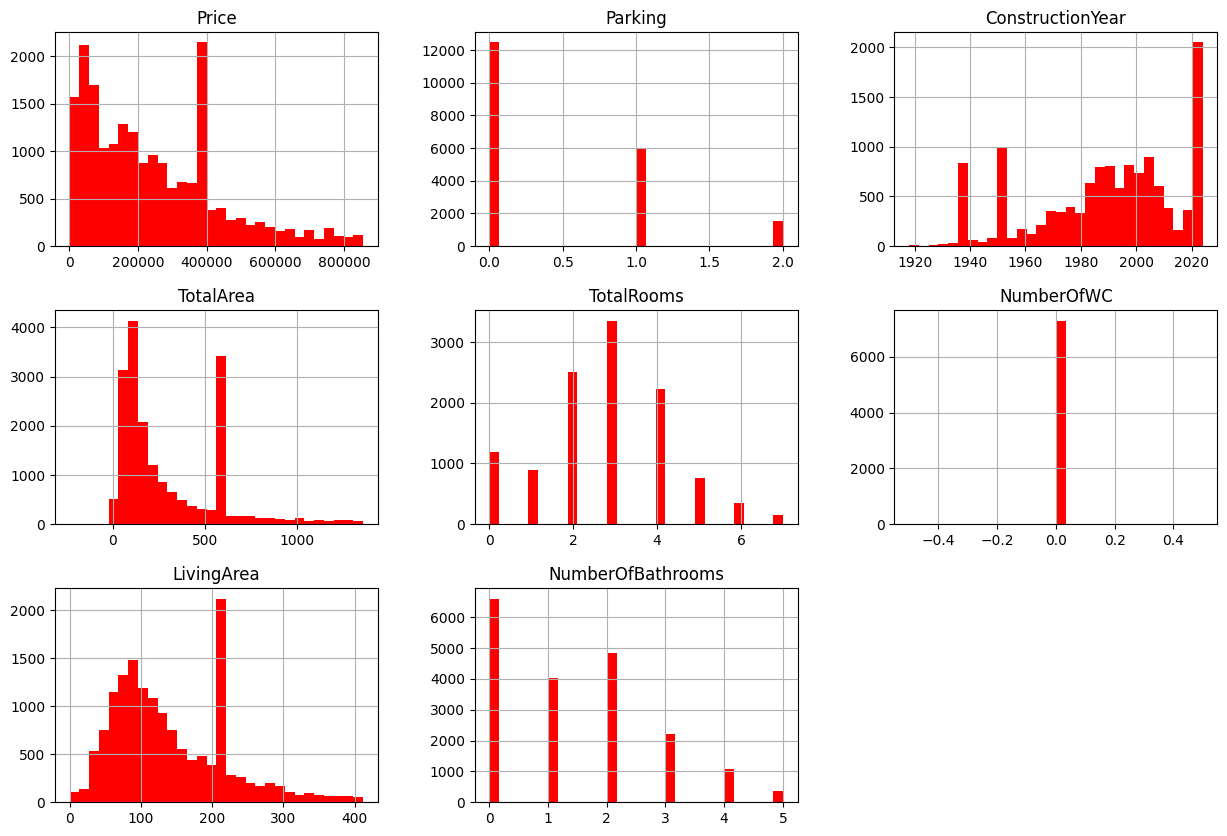

In [11]:
# visualisasi menggunakan histogram untuk melihat distribusi data
data.hist(figsize=(15, 10), bins=30,color='red');

In [12]:
# membuang data yang terduplikat
data.drop_duplicates(inplace=True)

In [13]:
# import library untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# import library untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

Imputation kolom dengan missing value < 30 %:

> Parking

> TotalArea

> LivingArea

> NumberOfBathrooms

In [15]:
# Imputasi missing value dengan median
columns_to_impute = ['LivingArea']

for column in columns_to_impute:
    data[column] = data[column].fillna(data[column].median())

In [16]:
# Hapus baris dengan nilai kosong di kolom 'ConstructionYear'
data = data.dropna(subset=['ConstructionYear'])

In [17]:
# Imputasi dengan modus
data['Lift'] = data['Lift'].fillna(data['Lift'].mode()[0])
data['Parking'] = data['Parking'].fillna(data['Parking'].mode()[0])
data['TotalArea'] = data['TotalArea'].fillna(data['TotalArea'].mode()[0])
data['NumberOfBathrooms'] = data['NumberOfBathrooms'].fillna(data['NumberOfBathrooms'].mode()[0])

<ipython-input-17-935928ca40b6>:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Lift'] = data['Lift'].fillna(data['Lift'].mode()[0])


In [18]:
# Hapus kolom dengan missing value
data = data.dropna(axis=1)

Data Duplicated

In [19]:
data[data.duplicated()]

,Price,District,City,Town,Type,EnergyCertificate,Lift,Parking,ConstructionYear,TotalArea,LivingArea,NumberOfBathrooms
2259,25000.0,Aveiro,Anadia,"Tamengos, Aguim e Óis do Bairro",Land,NC,False,0.0,1951.0,560.0,121.0,0.0
3446,77500.0,Castelo Branco,Penamacor,Pedrógão de São Pedro e Bemposta,House,NC,False,0.0,2020.0,122.0,122.0,3.0
3604,130000.0,Braga,Cabeceiras de Basto,"Refojos de Basto, Outeiro e Painzela",Store,C,False,0.0,2008.0,50.0,121.0,2.0
4227,390000.0,Faro,Monchique,Monchique,Building,C,False,0.0,1974.0,785.0,213.0,2.0
4756,850000.0,Lisboa,Lisboa,Misericórdia,Building,D,False,0.0,1951.0,265.0,244.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19622,290000.0,Castelo Branco,Covilhã,Aldeia de São Francisco de Assis,House,D,False,1.0,1991.0,600.0,213.0,4.0
19651,180000.0,Braga,Braga,São Victor,Apartment,C,False,0.0,1979.0,99.0,99.0,1.0
19739,75000.0,Braga,Vila Nova de Famalicão,Ribeirão,Warehouse,NC,False,1.0,2003.0,138.0,121.0,0.0
19899,43000.0,Lisboa,Lourinhã,Lourinhã e Atalaia,Land,NC,False,0.0,2002.0,107.0,107.0,0.0


In [20]:
data.drop_duplicates(inplace=True)

In [21]:
data[data.duplicated()]

,Price,District,City,Town,Type,EnergyCertificate,Lift,Parking,ConstructionYear,TotalArea,LivingArea,NumberOfBathrooms


EDA

In [22]:
# mengecek kolomdengan tipe data numerik
data_numerik = data.select_dtypes(include=['int64', 'float'])
data_numerik.columns

Index(['Price', 'Parking', 'ConstructionYear', 'TotalArea', 'LivingArea',
       'NumberOfBathrooms'],
      dtype='object')

In [23]:
data_karakter = data.select_dtypes(include=['object'])
data_karakter.columns

Index(['District', 'City', 'Town', 'Type', 'EnergyCertificate'], dtype='object')


Label Encoding

In [24]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data['District'] = encoder.fit_transform(data['District'])
data['City'] = encoder.fit_transform(data['City'])
data['Town'] = encoder.fit_transform(data['Town'])
data['Type'] = encoder.fit_transform(data['Type'])
data['EnergyCertificate'] = encoder.fit_transform(data['EnergyCertificate'])
data['Lift'] = encoder.fit_transform(data['Lift'])
data['ConstrutionYear'] = encoder.fit_transform(data['ConstructionYear'])
data['NumberOfBathrooms'] = encoder.fit_transform(data['NumberOfBathrooms'])

In [25]:
data.head()

,Price,District,City,Town,Type,EnergyCertificate,Lift,Parking,ConstructionYear,TotalArea,LivingArea,NumberOfBathrooms,ConstrutionYear
1,289000.0,18,136,352,7,5,0,2.0,1986.0,306.0,156.0,4,65
3,203000.0,16,240,1608,0,6,1,1.0,1996.0,118.0,92.0,2,75
5,599000.0,14,58,360,0,9,0,1.0,1989.0,151.0,151.0,2,68
6,139000.0,22,187,1135,7,7,0,0.0,1951.0,147.0,147.0,1,30
9,39900.0,2,66,288,16,9,0,0.0,1990.0,36.0,121.0,0,69


Data Visualization

In [26]:
# import library untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

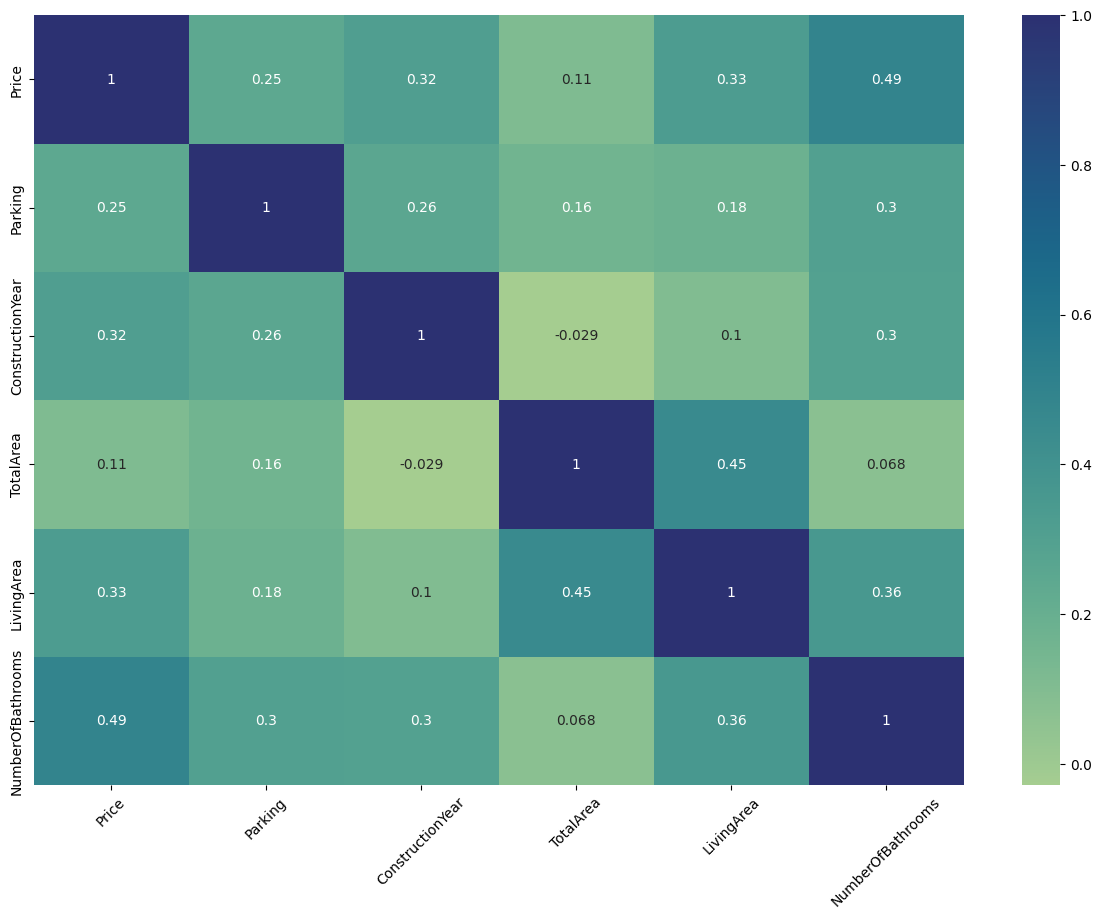

In [27]:
# visualisasi menggunakan heatmap untuk melihat korelasi antar variabel
plt.figure(figsize=(15, 10))
sns.heatmap(data_numerik.corr(), annot=True, cmap='crest')
plt.xticks(rotation=45)
plt.show()

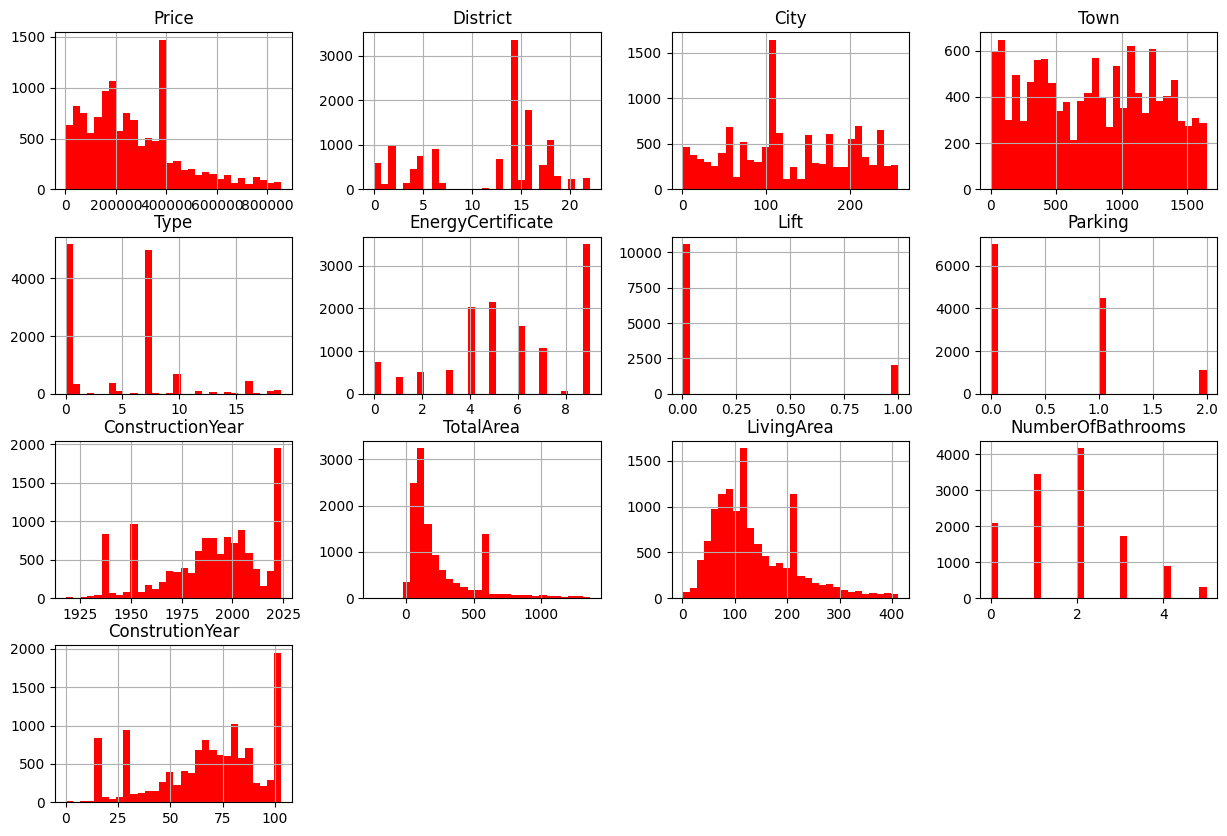

In [28]:
# visualisasi menggunakan histogram untuk melihat distribusi data
data.hist(figsize=(15, 10), bins=30,color='red');

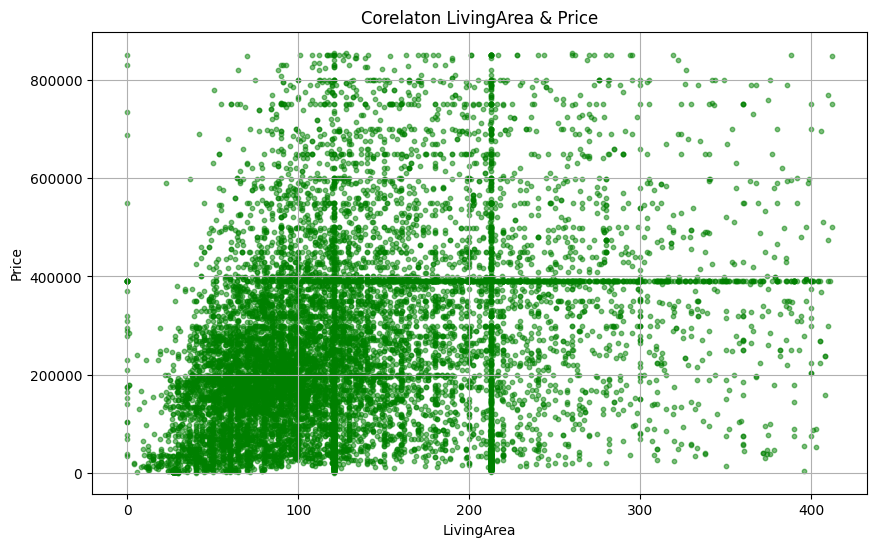

In [29]:
# visualisasi korelasi positif menggunakan scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(x=data['LivingArea'], y=data['Price'], color='green', alpha=0.5, s=10)
plt.title('Corelaton LivingArea & Price')
plt.xlabel('LivingArea')
plt.ylabel('Price')
plt.grid(True)
plt.show()

Normalization dan sclaer

In [30]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Buat objek scaler
scaler = StandardScaler()

# Tentukan kolom yang akan di-scale
columns_to_scale = ['TotalArea', 'LivingArea', 'Parking']

# Lakukan scaling pada kolom yang dipilih
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

# Sekarang kolom 'TotalArea', 'LivingArea', dan 'Parking' telah di-scale
print(data.head())

      Price  District  City  Town  Type  EnergyCertificate  Lift   Parking  \
1  289000.0        18   136   352     7                  5     0  2.244245   
3  203000.0        16   240  1608     0                  6     1  0.714397   
5  599000.0        14    58   360     0                  9     0  0.714397   
6  139000.0        22   187  1135     7                  7     0 -0.815450   
9   39900.0         2    66   288    16                  9     0 -0.815450   

   ConstructionYear  TotalArea  LivingArea  NumberOfBathrooms  ConstrutionYear  
1            1986.0   0.228554    0.268869                  4               65  
3            1996.0  -0.539362   -0.578981                  2               75  
5            1989.0  -0.404568    0.202631                  2               68  
6            1951.0  -0.420907    0.149640                  1               30  
9            1990.0  -0.874303   -0.194799                  0               69  


In [31]:
# membagi data fitur dan data target
x = data.drop('Price', axis=1)
y = data['Price']

In [32]:
x.head()

,District,City,Town,Type,EnergyCertificate,Lift,Parking,ConstructionYear,TotalArea,LivingArea,NumberOfBathrooms,ConstrutionYear
1,18,136,352,7,5,0,2.244245,1986.0,0.228554,0.268869,4,65
3,16,240,1608,0,6,1,0.714397,1996.0,-0.539362,-0.578981,2,75
5,14,58,360,0,9,0,0.714397,1989.0,-0.404568,0.202631,2,68
6,22,187,1135,7,7,0,-0.815450,1951.0,-0.420907,0.149640,1,30
9,2,66,288,16,9,0,-0.815450,1990.0,-0.874303,-0.194799,0,69


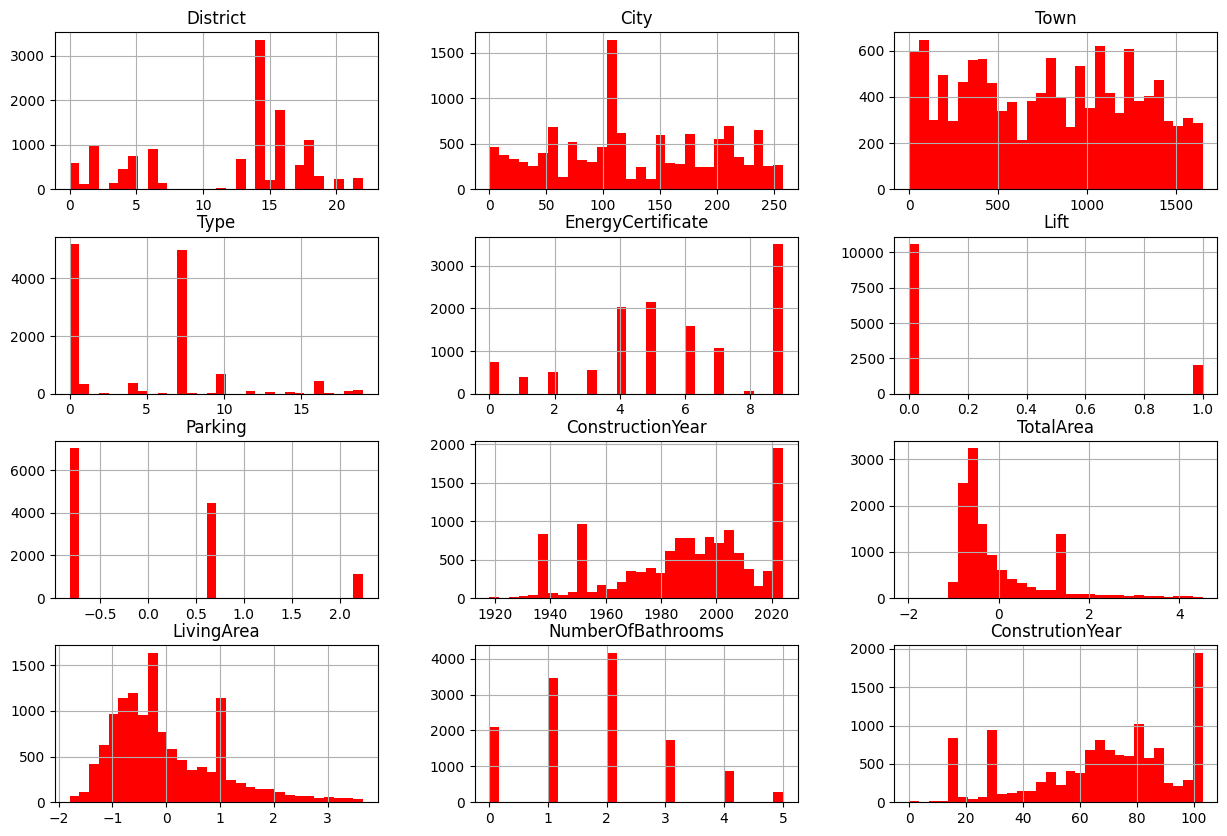

In [33]:
x.hist(figsize=(15, 10), bins=30,color='red');

Modeling

In [34]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Dataset Dummy (ganti dengan dataset Anda)
from sklearn.datasets import load_diabetes
data = load_diabetes()
X, y = data.data, data.target

# Split data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Daftar model yang akan diuji
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor()
}

# Menyimpan hasil evaluasi
results = []

# Iterasi melalui setiap model
for name, model in models.items():
    # Latih model
    model.fit(X_train, y_train)
    # Prediksi
    y_pred = model.predict(X_test)
    # Hitung metrik
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    # Simpan hasil
    results.append({
        "Model": name,
        "MAE": mae,
        "MSE": mse
    })

# Konversi hasil ke DataFrame untuk tampilan tabel
results_df = pd.DataFrame(results)

# Tampilkan tabel hasil
print(results_df)

               Model        MAE          MSE
0  Linear Regression  42.794095  2900.193628
1   Ridge Regression  46.138858  3077.415939
2   Lasso Regression  49.730328  3403.575722
3      Decision Tree  51.752809  4434.269663
4      Random Forest  45.220225  3081.694818
5  Gradient Boosting  44.746717  2909.944701
